In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial, comb
from mpl_toolkits import mplot3d
import ipympl
%matplotlib widget


In [2]:
points = np.array([[1.0169,
                    1.40575,
                    -0.994878],
                   [1.85294,
                    2.29963,
                    0.586899
                    ],
                   [0.959878,
                    3.07578,
                    2.19936],
                   [1.19476,
                    4.47883,
                    3.60516
                    ],
                   [2.64501,
                    5.8466,
                    3.76631
                    ],
                    [3.85277,
                   6.55501,
                   2.33821]
                   ,[ 5.29251,
                   7.02947,
                   3.64283]
                   ,[ 6.06737,
                   8.83467,
                   3.26754]
                   ,[  7.6291,
                   8.15817,
                   4.31795]
                   ,[10,
                   10,
                   2]])
#points = np.flipud(points)

In [3]:
# https://en.wikipedia.org/wiki/B%C3%A9zier_curve#General_definition

def spline(t, ps=points):
    pst = [
        p-ps[len(ps)-1]
        for p in ps
    ]
    n = len(pst)                   # total amount of points in spline
    spline_point = sum([
        comb(n, i)                # binomial term
        * t**(i) * (1 - t)**(n-i) # polynomial term
        * pn
        for i, pn in enumerate(pst)
    ])
    return spline_point + ps[len(ps)-1]

In [4]:
res = 40
t = np.linspace(0,1, res)

curve = np.array([spline(tn) for tn in t])
#print(curve)


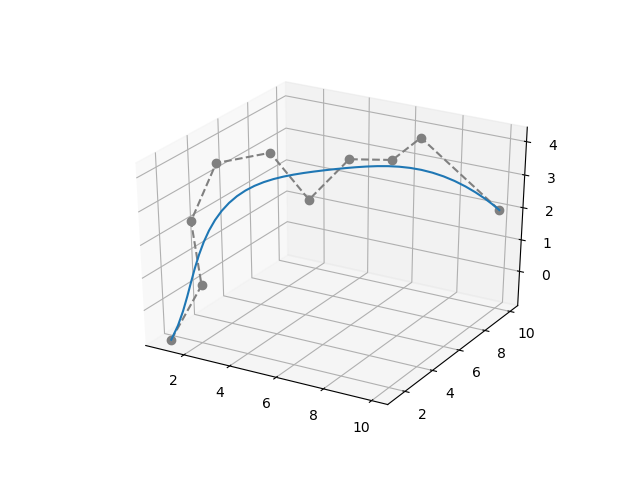

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(points[:, 0], points[:, 1], points[:, 2],
        marker='o', linestyle='--', color='grey')
ax.plot(curve[:,0], curve[:,1], curve[:,2])

In [6]:
input_points = np.array([
    [2,2,2],
    [3,3,3],
    [4,4,4],
    [4.5,6,3.5],
    [3.5,5,4.5],
    [2.5,4,3.5],
    [1.5,3,2.5],
    [2,3.5,4.5],
    [3,3,6],
    [4,2.5,7.5],
    [5,2,9],
    [6,1.5,10.5],
    [3,1.5,10.5],
    [0,1.5,10.5]
])

In [7]:
vectors = [
    input_points[i+1]-input_points[i]
    for i in range(len(input_points)-1)
]
vectors
# adjacent difference

[array([1., 1., 1.]),
 array([1., 1., 1.]),
 array([ 0.5,  2. , -0.5]),
 array([-1., -1.,  1.]),
 array([-1., -1., -1.]),
 array([-1., -1., -1.]),
 array([0.5, 0.5, 2. ]),
 array([ 1. , -0.5,  1.5]),
 array([ 1. , -0.5,  1.5]),
 array([ 1. , -0.5,  1.5]),
 array([ 1. , -0.5,  1.5]),
 array([-3.,  0.,  0.]),
 array([-3.,  0.,  0.])]

In [8]:
angles = [
    np.dot(vectors[i], vectors[i+1]) / (np.linalg.norm(vectors[i]) * np.linalg.norm(vectors[i+1]))
    for i in range(0,len(vectors)-1)
]
angles
# transform - two ranges

[1.0000000000000002,
 0.5443310539518174,
 -0.8164965809277261,
 0.33333333333333337,
 1.0000000000000002,
 -0.8164965809277261,
 0.8189230248533257,
 1.0,
 1.0,
 1.0,
 -0.5345224838248488,
 1.0]

In [9]:
splits = [0]
straight = False
for i in range(len(angles)):
    if np.allclose(angles[i], 1) and not straight:
        straight = True
    else:
        if straight:
            splits.append(i)
        # splits.append(0)
        straight = False;
splits.append(len(angles))
splits.append(len(input_points)-1)
splits

[0, 1, 5, 8, 10, 12, 13]

In [10]:
sections = [
    [
        input_points[i]
        for i in range(splits[s], splits[s+1]+1)
    ]
    for s in range(len(splits)-1)
]
sections
# transform - two ranges

[[array([2., 2., 2.]), array([3., 3., 3.])],
 [array([3., 3., 3.]),
  array([4., 4., 4.]),
  array([4.5, 6. , 3.5]),
  array([3.5, 5. , 4.5]),
  array([2.5, 4. , 3.5])],
 [array([2.5, 4. , 3.5]),
  array([1.5, 3. , 2.5]),
  array([2. , 3.5, 4.5]),
  array([3., 3., 6.])],
 [array([3., 3., 6.]), array([4. , 2.5, 7.5]), array([5., 2., 9.])],
 [array([5., 2., 9.]), array([ 6. ,  1.5, 10.5]), array([ 3. ,  1.5, 10.5])],
 [array([ 3. ,  1.5, 10.5]), array([ 0. ,  1.5, 10.5])]]

In [11]:
res = 40
t = np.linspace(0,1, res)

curves = [
    [
        spline(tn, sec)
        for tn in t
    ]
    for sec in sections
]
# curves[0]

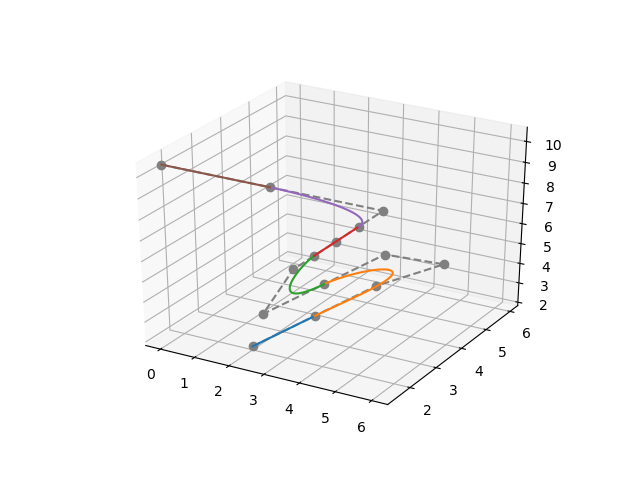

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(input_points[:, 0], input_points[:, 1], input_points[:, 2],
        marker='o', linestyle='--', color='grey')
for curve in curves:
        curve = np.array(curve)
        ax.plot(curve[:,0], curve[:,1], curve[:,2])

In [13]:
size = 5
odd = not (5 % 2 == 0)
list = [i for i in range(size)]
out = []

print(list)

integer_half = int(len(list) / 2)

for i in range(integer_half):
    out.append(list[i])
if odd:
    out.append(list[integer_half])
for i in range(integer_half):
    out.append(list[integer_half-1-i])

print(out)

[0, 1, 2, 3, 4]
[0, 1, 2, 1, 0]
